# PreProcessing Data Casal Montserratina

In [2]:
#Data Manipulation

import pandas as pd
import numpy as np
from datetime import timedelta

import matplotlib.pyplot as plt
import seaborn as sns

#Parameters Dict
parameters = {
    "paths": {
        "2022_01_06": "../data/data_casal_montserratina/Casal_Montserratina_202201_202206.csv",
        "2022_07_12": "../data/data_casal_montserratina/Casal_Montserratina_202207_202212.csv",
        "2023_01_06": "../data/data_casal_montserratina/Casal_Montserratina_202301_202306.csv",
        "2023_07_12": "../data/data_casal_montserratina/Casal_Montserratina_202307_202312.csv"
    }
}

In [3]:
df1 = pd.read_csv(parameters["paths"]["2022_01_06"], delimiter=";")
df2 = pd.read_csv(parameters["paths"]["2022_07_12"], delimiter=";")
df3 = pd.read_csv(parameters["paths"]["2023_01_06"], delimiter=";")
df4 = pd.read_csv(parameters["paths"]["2023_07_12"], delimiter=";")

for i in range(1, 5):
    df_name = 'df' + str(i)
    eval(df_name)["TimeStamp"] = pd.to_datetime(eval(df_name)["TimeStamp"], format="%d/%m/%Y %H:%M")
    eval(df_name).rename(columns={'TimeStamp': 'Date'}, inplace=True)
    eval(df_name).rename(columns={'Valor': 'Consumo_red'}, inplace=True)
    eval(df_name).rename(columns={'Període tarifari': 'Periode_tarifari'}, inplace=True)
    eval(df_name).rename(columns={'Tipus lectura': 'Tipus_lectura'}, inplace=True)
    print(f"Dataset {i}, Nº of rows: {eval(df_name).shape[0]}")

Dataset 1, Nº of rows: 3959
Dataset 2, Nº of rows: 4177
Dataset 3, Nº of rows: 4343
Dataset 4, Nº of rows: 3841


In [4]:
# hago un concat de los 4 datasets, para Unir los DataFrames uno a continuación del otro
df = pd.concat([df1, df2, df3, df4], ignore_index=True)

df.head(2)

,Date,Consumo_red,Periode_tarifari,Tipus_lectura
0,2022-01-01 00:00:00,6,6,Real
1,2022-01-01 01:00:00,6,6,Real


In [5]:
df.tail()

,Date,Consumo_red,Periode_tarifari,Tipus_lectura
16315,2023-12-31 19:00:00,2,6,Real
16316,2023-12-31 20:00:00,2,6,Real
16317,2023-12-31 21:00:00,2,6,Real
16318,2023-12-31 22:00:00,2,6,Real
16319,2023-12-31 23:00:00,2,6,Real


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16320 entries, 0 to 16319
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date              16320 non-null  datetime64[ns]
 1   Consumo_red       16320 non-null  int64         
 2   Periode_tarifari  16320 non-null  int64         
 3   Tipus_lectura     16320 non-null  object        
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 510.1+ KB


In [7]:
df.describe()

,Date,Consumo_red,Periode_tarifari
count,16320,16320.000000,16320.000000
mean,2022-12-28 02:09:00,5.680515,4.553431
min,2022-01-01 00:00:00,0.000000,1.000000
25%,2022-07-07 00:45:00,2.000000,3.000000
50%,2023-01-01 23:30:00,3.000000,6.000000
75%,2023-06-21 00:15:00,6.000000,6.000000
max,2023-12-31 23:00:00,68.000000,6.000000
std,NaN,7.814318,1.779661


In [8]:
df["Tipus_lectura"].value_counts(normalize=True)

Tipus_lectura
Real           0.996936
No informat    0.003064
Name: proportion, dtype: float64

## Date

### Missing values

In [9]:
#Prints the NaN Values per Column of a dataset
def checkNaNValues(df):
    return print(f"NaN Count per Column", df.isna().any(axis=1).sum())

#Checks if there is any missing time series
def checkMissingData(df, date_column):
    min_date = df[date_column].min()
    max_date = df[date_column].max()

    date_range = pd.date_range(start=min_date, end=max_date, freq='h')
    missing_dates = date_range[~date_range.isin(df[date_column])]
    print(f"Number of Missing Values: {missing_dates.shape[0]}")
    return None if missing_dates.shape[0] == 0 else missing_dates, date_range

In [10]:
checkNaNValues(df)
missing_dates, date_range = checkMissingData(df, 'Date')

NaN Count per Column 0
Number of Missing Values: 1202


let's visualize the missing values

In [12]:
for i in range(1202):
    print(missing_dates[i])

2022-03-27 02:00:00
2022-04-10 00:00:00
2022-04-10 01:00:00
2022-04-10 02:00:00
2022-04-10 03:00:00
2022-04-10 04:00:00
2022-04-10 05:00:00
2022-04-10 06:00:00
2022-04-10 07:00:00
2022-04-10 08:00:00
2022-04-10 09:00:00
2022-04-10 10:00:00
2022-04-10 11:00:00
2022-04-10 12:00:00
2022-04-10 13:00:00
2022-04-10 14:00:00
2022-04-10 15:00:00
2022-04-10 16:00:00
2022-04-10 17:00:00
2022-04-10 18:00:00
2022-04-10 19:00:00
2022-04-10 20:00:00
2022-04-10 21:00:00
2022-04-10 22:00:00
2022-04-10 23:00:00
2022-04-19 00:00:00
2022-04-19 01:00:00
2022-04-19 02:00:00
2022-04-19 03:00:00
2022-04-19 04:00:00
2022-04-19 05:00:00
2022-04-19 06:00:00
2022-04-19 07:00:00
2022-04-19 08:00:00
2022-04-19 09:00:00
2022-04-19 10:00:00
2022-04-19 11:00:00
2022-04-19 12:00:00
2022-04-19 13:00:00
2022-04-19 14:00:00
2022-04-19 15:00:00
2022-04-19 16:00:00
2022-04-19 17:00:00
2022-04-19 18:00:00
2022-04-19 19:00:00
2022-04-19 20:00:00
2022-04-19 21:00:00
2022-04-19 22:00:00
2022-04-19 23:00:00
2022-04-20 00:00:00


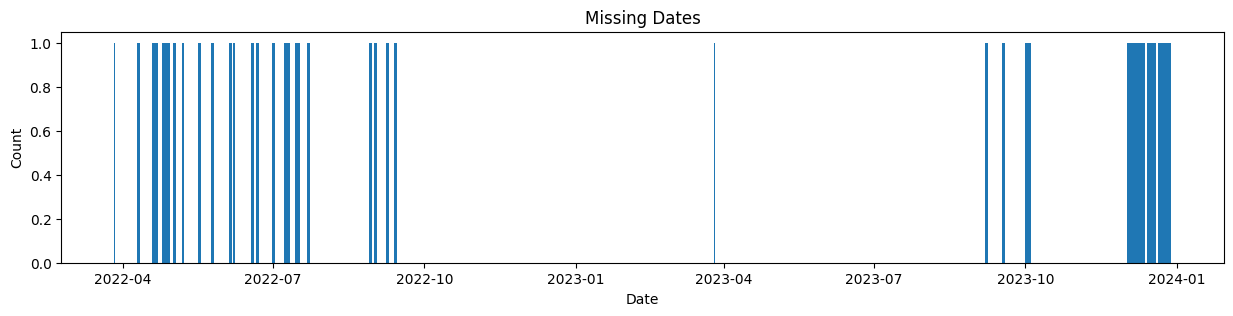

In [ ]:
plt.figure(figsize=(15, 3))
plt.bar(missing_dates, [1] * len(missing_dates))
plt.title("Missing Dates")
plt.xlabel("Date")
plt.ylabel("Count")
# plt.xticks(rotation=0)
plt.show()

In [ ]:
# Change display options to show more rows
pd.set_option('display.max_rows', 650)

print(df[(df["Date"]>"2022-04-09 22:00:00") & (df["Date"]<"2022-04-11 02:00:00")])

# Reset display options to default
pd.reset_option('display.max_rows')

                    Date  Consumo_red  Periode_tarifari Tipus_lectura
2374 2022-04-09 23:00:00            2                 6          Real
2375 2022-04-11 00:00:00            2                 6          Real
2376 2022-04-11 01:00:00            2                 6          Real


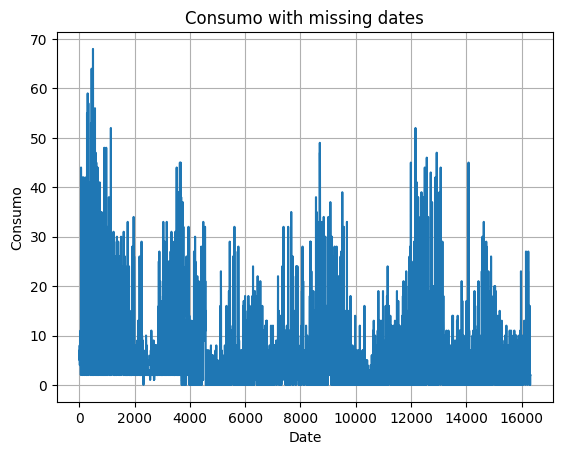

In [ ]:
merged_data = df.reindex(date_range) # reindex the dataframe based on the date range
consumo = df["Consumo_red"]
missing_dates_mask = consumo.isna()
# Plotting Consumo with breaks for missing dates
plt.plot(consumo.index, consumo)
plt.title("Consumo with missing dates")
plt.xlabel("Date")
plt.ylabel("Consumo")
plt.grid(True)
if missing_dates_mask[i]:
    plt.axvline(consumo.index[i], color="red", linestyle=" - ")
    print("hola")
# plt.show()

### Filling the gaps on DATE 

In [ ]:
# creo df_reindexed con el indice completo, aunque lleno de NaN
df_reindexed = df.reindex(date_range)
df_reindexed.reset_index(inplace=True)
df_reindexed.drop(columns=['Date'], inplace=True)
df_reindexed.rename(columns={'index': 'Date'}, inplace=True)

df_reindexed.head(2)

,Date,Consumo_red,Periode_tarifari,Tipus_lectura
0,2022-01-01 00:00:00,NaN,NaN,NaN
1,2022-01-01 01:00:00,NaN,NaN,NaN


In [ ]:
# confirmacion de que ahora el indice es completo
print(df_reindexed[(df_reindexed["Date"]>"2022-04-09 22:00:00") & (df_reindexed["Date"]<"2022-04-11 02:00:00")])

                    Date  Consumo_red  Periode_tarifari Tipus_lectura
2375 2022-04-09 23:00:00          NaN               NaN           NaN
2376 2022-04-10 00:00:00          NaN               NaN           NaN
2377 2022-04-10 01:00:00          NaN               NaN           NaN
2378 2022-04-10 02:00:00          NaN               NaN           NaN
2379 2022-04-10 03:00:00          NaN               NaN           NaN
2380 2022-04-10 04:00:00          NaN               NaN           NaN
2381 2022-04-10 05:00:00          NaN               NaN           NaN
2382 2022-04-10 06:00:00          NaN               NaN           NaN
2383 2022-04-10 07:00:00          NaN               NaN           NaN
2384 2022-04-10 08:00:00          NaN               NaN           NaN
2385 2022-04-10 09:00:00          NaN               NaN           NaN
2386 2022-04-10 10:00:00          NaN               NaN           NaN
2387 2022-04-10 11:00:00          NaN               NaN           NaN
2388 2022-04-10 12:0

In [ ]:
# hago un merge entre df_reindexed y df, para tener la columna de Date completa
df_completo = pd.merge(df_reindexed, df, on='Date', how='left')
df_completo.drop(columns=['Consumo_red_x', 'Periode_tarifari_x', 'Tipus_lectura_x'], inplace=True)
df_completo.rename(columns={'Consumo_red_y': 'Consumo_red', 'Periode_tarifari_y': 'Periode_tarifari', 'Tipus_lectura_y': 'Tipus_lectura'}, inplace=True)
df_completo.head(2)

,Date,Consumo_red,Periode_tarifari,Tipus_lectura
0,2022-01-01 00:00:00,6.0,6.0,Real
1,2022-01-01 01:00:00,6.0,6.0,Real


In [ ]:
missing_dates, date_range = checkMissingData(df_completo, "Date")

Number of Missing Values: 0


In [ ]:
print(df_completo[(df_completo["Date"]>"2022-04-09 20:00:00") & (df_completo["Date"]<"2022-04-11 02:00:00")])

                    Date  Consumo_red  Periode_tarifari Tipus_lectura
2373 2022-04-09 21:00:00          2.0               6.0          Real
2374 2022-04-09 22:00:00          2.0               6.0          Real
2375 2022-04-09 23:00:00          2.0               6.0          Real
2376 2022-04-10 00:00:00          NaN               NaN           NaN
2377 2022-04-10 01:00:00          NaN               NaN           NaN
2378 2022-04-10 02:00:00          NaN               NaN           NaN
2379 2022-04-10 03:00:00          NaN               NaN           NaN
2380 2022-04-10 04:00:00          NaN               NaN           NaN
2381 2022-04-10 05:00:00          NaN               NaN           NaN
2382 2022-04-10 06:00:00          NaN               NaN           NaN
2383 2022-04-10 07:00:00          NaN               NaN           NaN
2384 2022-04-10 08:00:00          NaN               NaN           NaN
2385 2022-04-10 09:00:00          NaN               NaN           NaN
2386 2022-04-10 10:0

In [ ]:
df_completo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17522 entries, 0 to 17521
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date              17522 non-null  datetime64[ns]
 1   Consumo_red       16320 non-null  float64       
 2   Periode_tarifari  16320 non-null  float64       
 3   Tipus_lectura     16320 non-null  object        
dtypes: datetime64[ns](1), float64(2), object(1)
memory usage: 547.7+ KB


In [ ]:
def rellenar_con_semana_anterior(dataframe):
    # para evitar problemas, primero Ordenar el DataFrame por la columna 'date'
    dataframe = dataframe.sort_values('Date')
    
    # Rellenar los valores faltantes utilizando un desplazamiento semanal
    dataframe['Consumo_red'] = dataframe['Consumo_red'].fillna(dataframe['Consumo_red'].shift(7))
    
    #return dataframe

In [ ]:
rellenar_con_semana_anterior(df_completo)

In [ ]:
def consumo_en_fechas(dataframe, fecha, shift=0):
    fecha_original = pd.to_datetime(fecha)
    fecha_desplazada = fecha_original + pd.Timedelta(days=shift)
    
    consumo_original = dataframe.loc[dataframe["Date"] == fecha_original, "Consumo_red"].values
    consumo_desplazado = dataframe.loc[dataframe["Date"] == fecha_desplazada, "Consumo_red"].values

    print("Consumo en la fecha original:", fecha_original, consumo_original)
    print("Consumo en la fecha desplazada:", fecha_desplazada, consumo_desplazado)

    #return fecha_original, fecha_desplazada, consumo_original, consumo_desplazado



# Ejemplo de uso:
consumo_en_fechas(df_completo, "2022-01-10 05:00:00", shift=-7)

Consumo en la fecha original: 2022-01-10 05:00:00 [11.]
Consumo en la fecha desplazada: 2022-01-03 05:00:00 [6.]


In [ ]:
consumo_en_fechas(df_completo, "2022-04-10 05:00:00", shift=7)


Consumo en la fecha original: 2022-04-10 05:00:00 [nan]
Consumo en la fecha desplazada: 2022-04-17 05:00:00 [2.]


In [ ]:
df_completo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17522 entries, 0 to 17521
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date              17522 non-null  datetime64[ns]
 1   Consumo_red       16525 non-null  float64       
 2   Periode_tarifari  16320 non-null  float64       
 3   Tipus_lectura     16320 non-null  object        
dtypes: datetime64[ns](1), float64(2), object(1)
memory usage: 547.7+ KB


## Consumo Red

<Axes: >

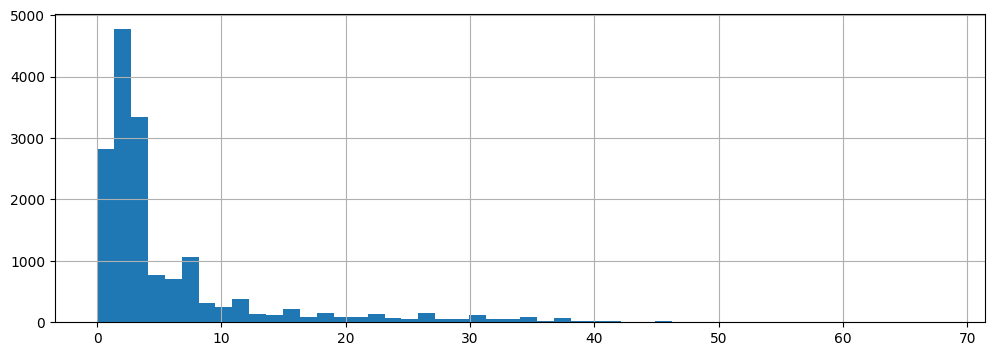

In [ ]:
df["Consumo_red"].hist(bins= 50, figsize= [12,4])

c:\Users\afernandez\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\afernandez\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


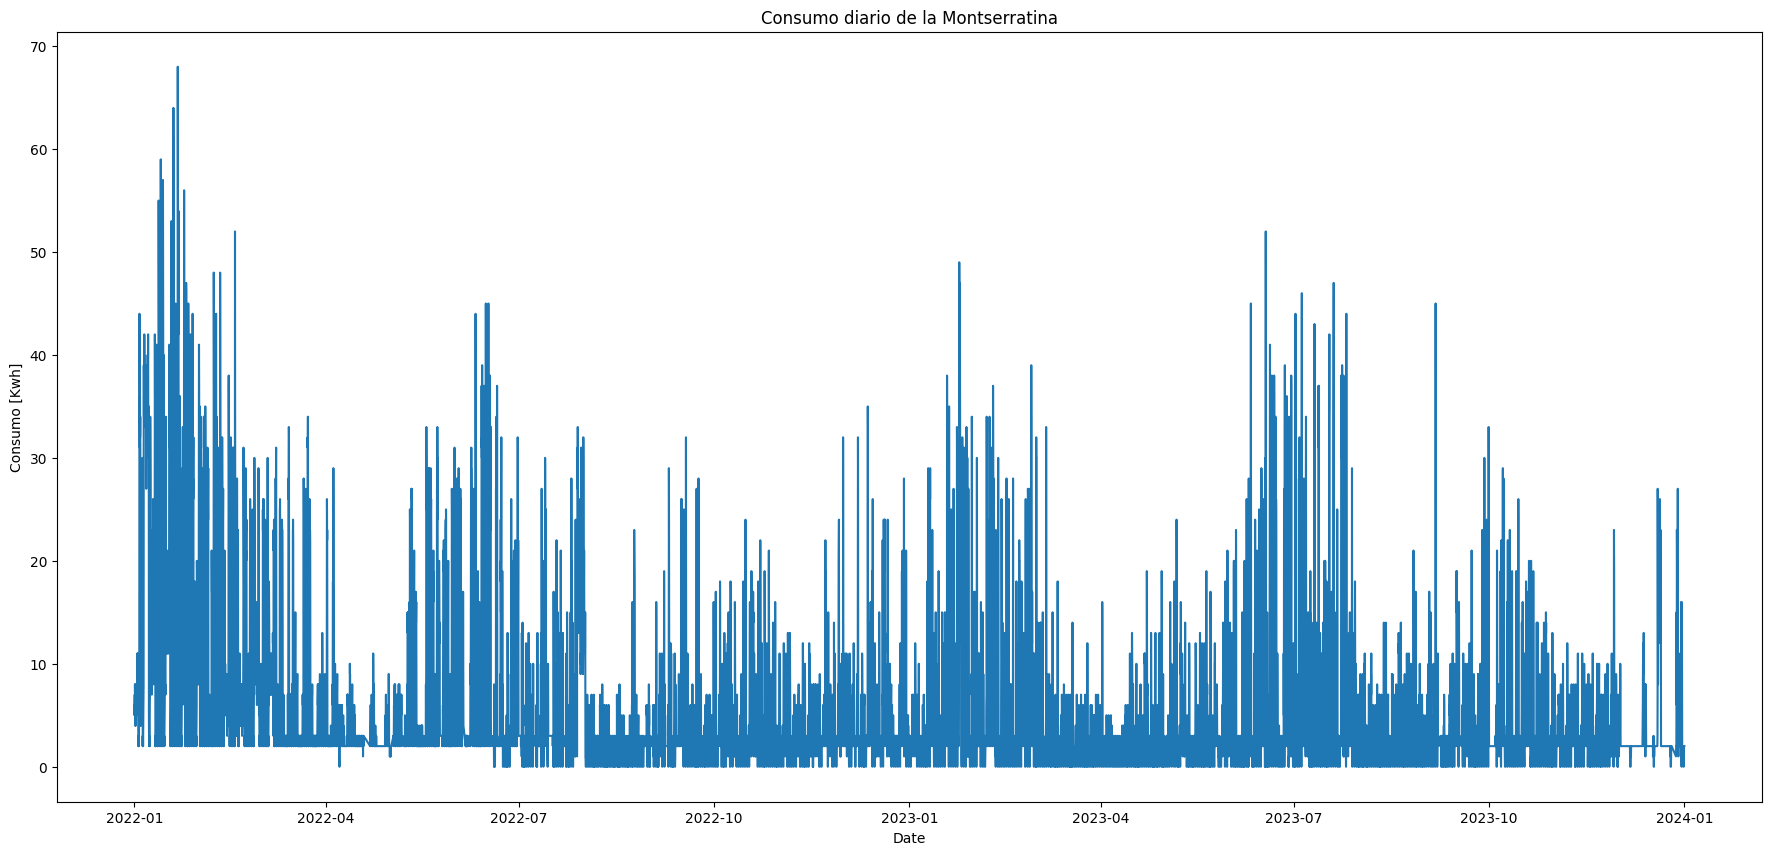

In [ ]:
plt.figure(figsize=(22, 10)) # Width and Height of the chart
sns.lineplot(x='Date',
             y='Consumo_red',
             data=df )
plt.xlabel('Date') # x-axis name
plt.ylabel('Consumo [Kwh]') # y-axis name
plt.title('Consumo diario de la Montserratina') # Add a title
plt.show() # Display the graph

### Smooth Consumo

In [ ]:
from whittaker_eilers import WhittakerSmoother

whittaker_smoother = WhittakerSmoother(
    lmbda=2e4, 
    order=10, 
    data_length=len(df), 
    #weights=weights
)

df["smoothed_consumo"] = whittaker_smoother.smooth(df["Consumo_red"])
df = df.reset_index(drop=True)

c:\Users\afernandez\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\afernandez\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


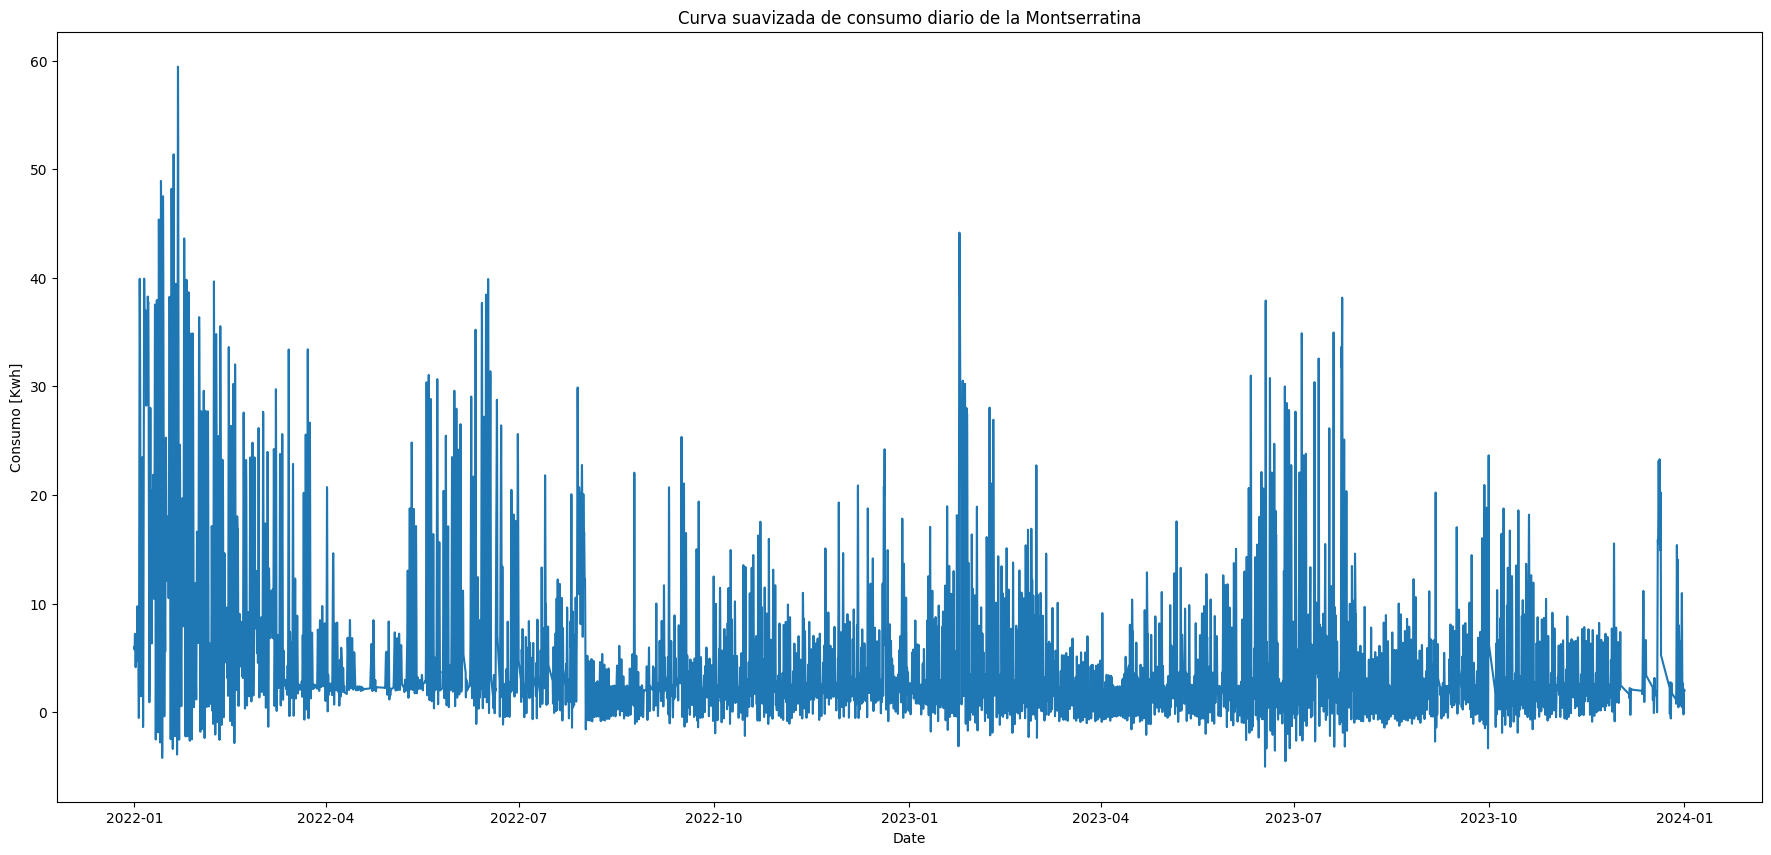

In [ ]:
plt.figure(figsize=(22, 10)) # Width and Height of the chart
sns.lineplot(x='Date',
             y='smoothed_consumo',
             data=df )
plt.ylabel('Consumo [Kwh]') # x-axis name
plt.xlabel('Date') # y-axis name
plt.title('Curva suavizada de consumo diario de la Montserratina') # Add a title
plt.show() # Display the graph

## Periodo tarifario

In [ ]:
df["Periode_tarifari"].value_counts(normalize=True)

Periode_tarifari
6    0.537255
4    0.116054
2    0.111152
3    0.106127
1    0.080515
5    0.048897
Name: proportion, dtype: float64

## Tipo Lectura

In [ ]:
df["Tipus_lectura"].value_counts(normalize=True)

Tipus_lectura
Real           0.996936
No informat    0.003064
Name: proportion, dtype: float64